In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
csv_path = "Resources/merged.csv"

merged_df = pd.read_csv(csv_path)

merged_df.head()

,Country_Code,Country,Year,Start_Date,Event_Name,Hazard_Category,Hazard_Type,New_Displacements,Country_2D,Continent,Population
0,AGO,Angola,2013,3/20/2013,Luanda floods,Weather related,Flood,2450.0,AO,AF,26015780
1,AGO,Angola,2015,3/28/2015,Cuanza Sul flood,Weather related,Flood,483.0,AO,AF,27884381
2,AGO,Angola,2015,3/9/2015,Luanda flash floods,Weather related,Flood,3920.0,AO,AF,27884381
3,AGO,Angola,2015,3/11/2015,Lobito flash flood,Weather related,Flood,1192.0,AO,AF,27884381
4,AGO,Angola,2016,1/1/2016,Rainy season floods,Weather related,Flood,19103.0,AO,AF,28842484


In [11]:
hazard_counts = merged_df["Hazard_Type"].value_counts()
hazard_counts

Flood                  485
Storm                  210
Wet mass movement       41
Wildfire                29
Drought                 12
Earthquake              10
Dry mass movement        5
Extreme temperature      1
Volcanic eruption        1
Volcanic activity        1
Name: Hazard_Type, dtype: int64

In [8]:
grouped_hazard_df = merged_df.groupby(['Hazard_Type'])

grouped_hazard_df.count().head(10)

,Country_Code,Country,Year,Start_Date,Event_Name,Hazard_Category,New_Displacements,Country_2D,Continent,Population
Hazard_Type,,,,,,,,,,
Drought,12,12,12,12,12,12,12,12,12,12
Dry mass movement,5,5,5,5,5,5,5,5,5,5
Earthquake,10,10,10,10,10,10,10,10,10,10
Extreme temperature,1,1,1,1,1,1,1,1,1,1
Flood,485,485,485,485,485,485,485,476,485,485
Storm,210,210,210,210,210,210,210,208,210,210
Volcanic activity,1,1,1,1,1,1,1,1,1,1
Volcanic eruption,1,1,1,1,1,1,1,1,1,1
Wet mass movement,41,41,41,41,41,41,41,41,41,41


In [10]:
displaced_total = grouped_hazard_df["New_Displacements"].sum()
displaced_total


Hazard_Type
Drought                1846511.0
Dry mass movement         9954.0
Earthquake               19727.0
Extreme temperature       1425.0
Flood                  8620983.0
Storm                  1652915.0
Volcanic activity         3900.0
Volcanic eruption         2500.0
Wet mass movement        26210.0
Wildfire                 39230.0
Name: New_Displacements, dtype: float64

In [14]:
# Creating a new DataFrame using both duration and count
hazard_summary_df = pd.DataFrame({"Instances of Hazard": hazard_counts,
                                    "Total New Displacements": displaced_total})
hazard_summary_df.head()

,Instances of Hazard,Total New Displacements
Drought,12,1846511.0
Dry mass movement,5,9954.0
Earthquake,10,19727.0
Extreme temperature,1,1425.0
Flood,485,8620983.0


In [6]:
x_axis = np.arange(len(displaced_df))
tick_locations = [value for value in x_axis]

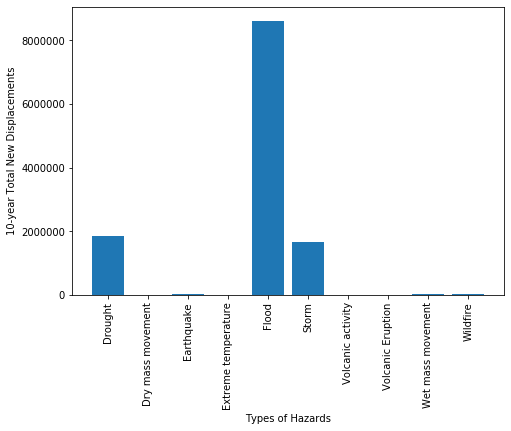

<Figure size 432x288 with 0 Axes>

In [22]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Hazards = ["Drought", "Dry mass movement", "Earthquake", "Extreme temperature", "Flood", "Storm", "Volcanic activity", "Volcanic Eruption", "Wet mass movement", "Wildfire"]
Data = hazard_summary_df["Total New Displacements"]
ax.bar(Hazards,Data)
plt.xticks(rotation=90)
plt.xlabel("Types of Hazards")
plt.ylabel("10-year Total New Displacements")
plt.show()
plt.savefig("out.png")

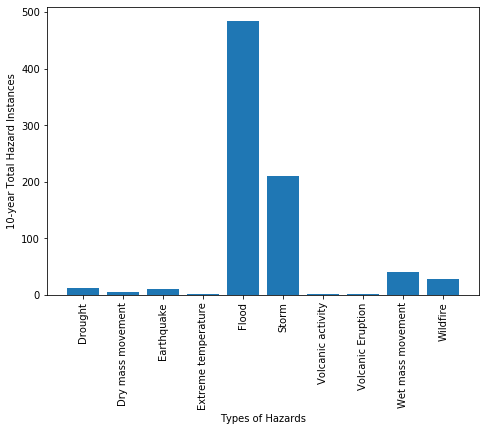

<Figure size 432x288 with 0 Axes>

In [23]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Hazards = ["Drought", "Dry mass movement", "Earthquake", "Extreme temperature", "Flood", "Storm", "Volcanic activity", "Volcanic Eruption", "Wet mass movement", "Wildfire"]
Data = hazard_summary_df["Instances of Hazard"]
ax.bar(Hazards,Data)
plt.xticks(rotation=90)
plt.xlabel("Types of Hazards")
plt.ylabel("10-year Total Hazard Instances")
plt.show()
plt.savefig("image.png")